In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from network import Network
import torch


In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# hh_all = hh_raw[['h1_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
# qcd = qcd_raw[['h1_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
n_factors = np.shape(hh_all)[1]
print(n_factors)

# change this for testing w dummy variables
# n_factors = 2

1703 rows of qcd data
4605 rows of dihiggs data
4


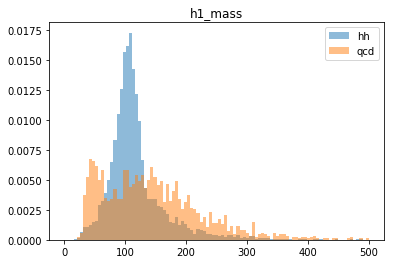

In [3]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

In [4]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

# add labels to di-higgs
hh_all=hh_all[:,:n_factors]
# print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all = np.append(hh_all, hh_labels, axis=1)
# hh_all = np.append(hh_all, 1-hh_labels, axis=1)## hh qcd labels 


# print(hh.shape)
# print(hh[0:3])

# add labels to qcd
qcd=qcd[:,:n_factors]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
# qcd hh labels 
qcd = np.append(qcd, qcd_labels, axis=1) # qcd qcd labels
# qcd = np.append(qcd, 1-qcd_labels, axis=1)


# use this for dummy variables
hh_all[:,0] = np.random.rand(np.shape(hh_all)[0])
hh_all[:,1] = np.random.rand(np.shape(hh_all)[0])
qcd[:, 0] = -1 * np.random.rand(np.shape(qcd)[0])
qcd[:, 1] = -1 * np.random.rand(np.shape(qcd)[0])

# 

# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]
# print(hh[:4])
# print(qcd[:4])

all_data = np.append(hh,qcd, axis=0) 
all_data[:n_factors,:]

np.random.seed(0)
for i in range (4): # shuffle 4 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,n_factors:]
# for testing model resilience
# for i in range(2):
#     np.random.shuffle(all_labels)
all_data = all_data[:,:n_factors]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[ 0.23826054  0.33913594  1.83328407  2.89078642  1.        ]
 [-0.89317614 -0.61660142  2.84355966  1.90858838  0.        ]
 [ 0.31417353  0.58427002  0.69238905  0.53948599  1.        ]
 [ 0.34997693  0.37739854  2.65217628  2.29208081  1.        ]]
[[1.]
 [0.]
 [1.]
 [1.]]


In [5]:
# scale the data by dividing it by the max value of each
for i in range(np.shape(all_data)[1]):
    all_data[:,i] = np.true_divide(all_data[:,i], np.max(all_data[:,i]))
print(all_data[:6])

[[ 0.23832852  0.33931106  0.33357623  0.57712665]
 [-0.89343098 -0.61691982  0.51740149  0.38103722]
 [ 0.31426317  0.58457173  0.12598404  0.10770486]
 [ 0.35007678  0.37759343  0.48257822  0.45759898]
 [ 0.67910456  0.92494672  0.21440869  0.20371209]
 [ 0.96569967  0.94841008  0.41515972  0.68961231]]


In [6]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.5, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)
train_data = torch.from_numpy(train_data)
# train_data = torch.zeros(len(train_labels), 4)
test_data = torch.from_numpy(test_data)
# test_data = torch.zeros(len(test_labels), 4)
train_labels = torch.from_numpy(train_labels)
test_labels = torch.from_numpy(test_labels)

print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)


torch.Size([1703, 4])
torch.Size([1703, 4])
torch.Size([1703, 1])
torch.Size([1703, 1])


In [7]:
learnRate = 0.001
np.random.seed(0)
model = Network([n_factors, 3, 1])
model.train(train_data, train_labels, 2701, learnRate, 0, True, test_data, test_labels)


train accuracy at epoch 0 is: 49.67704051673517
test accuracy is: 50.32295948326483
train accuracy at epoch 300 is: 65.29653552554315
test accuracy is: 64.88549618320612
train accuracy at epoch 600 is: 80.3875513799178
test accuracy is: 78.91955372871404
train accuracy at epoch 900 is: 74.92660011743982
test accuracy is: 74.75044039929536
train accuracy at epoch 1200 is: 71.7557251908397
test accuracy is: 71.0510863182619
train accuracy at epoch 1500 is: 71.0510863182619
test accuracy is: 71.34468584850265
train accuracy at epoch 1800 is: 73.2824427480916
test accuracy is: 72.75396359365824
train accuracy at epoch 2100 is: 76.45331767469172
test accuracy is: 75.92483852025836
train accuracy at epoch 2400 is: 80.44627128596595
test accuracy is: 79.50675278919553
train accuracy at epoch 2700 is: 84.02818555490312
test accuracy is: 83.02994715208456


In [8]:
# testout = model.get_output().numpy()
# testout[testout>.5] = 1
# testout[test out<=.5] = 0
# print("train", np.sum(train_labels.numpy()))
# print("test", np.sum(test_labels.numpy()))
# print("out", np.sum(testout))
# print("train acc", (1-(np.sum(np.abs(train_labels.numpy()-testout))/len(train_labels.numpy())))
#      )
# print("test acc", (1-(np.sum(np.abs(test_labels.numpy()-testout))/len(test_labels.numpy())))
#      )


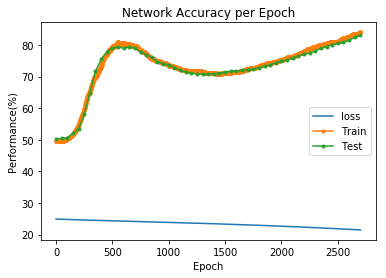

In [9]:
# print(model.losses)
plt.plot(model.losses, label="loss")
plt.plot(model.train_accuracies, label="Train", marker=".")
plt.plot(model.test_num, model.test_accuracies, label="Test", marker=".")
plt.xlabel("Epoch")
plt.ylabel("Performance(%)")
plt.title("Network Accuracy per Epoch")
plt.legend()
plt.show()

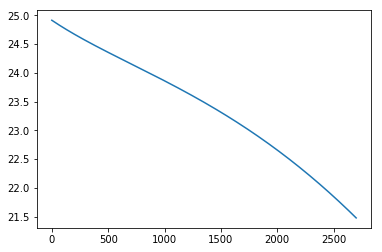

In [10]:
plt.plot(model.losses)

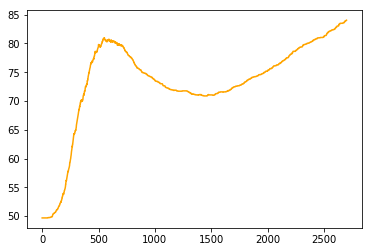

In [11]:
plt.plot(model.train_accuracies, label="Train", color="orange")


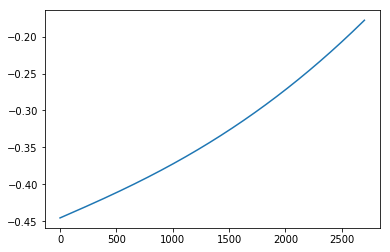

In [12]:
plt.plot(model.weight_change)

In [13]:
print(len(model.weights))
print(model.weights)

2
[tensor([[-0.1778,  0.7477, -2.2830],
        [ 1.0548, -1.8976,  0.4190],
        [ 0.5143,  0.3677,  0.5005],
        [-0.0404,  1.6424, -0.0368]]), tensor([[ 0.3314],
        [-0.1197],
        [-0.5153]])]


In [14]:
print(model.biases)

[tensor([[-0.0158, -0.0158, -0.0158]]), tensor([[0.0588]])]


In [15]:
print(model.layers)

[tensor([[0.6068, 0.4756, 0.3713],
        [0.3030, 0.8856, 0.8049],
        [0.4926, 0.7993, 0.8918],
        ...,
        [0.5399, 0.6338, 0.4289],
        [0.3889, 0.8761, 0.8468],
        [0.3468, 0.8993, 0.8153]]), tensor([[0.5029],
        [0.4106],
        [0.4175],
        ...,
        [0.4852],
        [0.4125],
        [0.4124]])]


In [16]:
model.get_output()

tensor([[0.5029],
        [0.4106],
        [0.4175],
        ...,
        [0.4852],
        [0.4125],
        [0.4124]])

In [17]:
print(model.weights)

[tensor([[-0.1778,  0.7477, -2.2830],
        [ 1.0548, -1.8976,  0.4190],
        [ 0.5143,  0.3677,  0.5005],
        [-0.0404,  1.6424, -0.0368]]), tensor([[ 0.3314],
        [-0.1197],
        [-0.5153]])]


In [18]:
print(1-sum(train_labels)/len(train_labels))

tensor([0.5032], dtype=torch.float64)


In [19]:
print(train_data)

tensor([[ 0.3218,  0.4456,  0.0953,  0.2971],
        [-0.7858, -0.9381,  0.1024,  0.5069],
        [-0.8861, -0.4416,  0.6195,  0.6054],
        ...,
        [ 0.1778,  0.1109,  0.2027,  0.3455],
        [-0.7979, -0.7669,  0.4933,  0.5675],
        [-0.7237, -0.9453,  0.5241,  0.4626]], dtype=torch.float64)
